In [1]:
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

In [3]:
cases = pd.read_csv('cases_england.csv')
deaths = pd.read_csv('deaths.csv')

In [8]:
cases_dates_corrected = []
for date in cases.Date.values:
    cases_dates_corrected.append(datetime.date(year=int(date[7:]), month=months[date[3:6]], day=int(date[:2])))

cases['Date_'] = cases_dates_corrected

deaths_dates_corrected = []
for date in deaths.Date.values:
    deaths_dates_corrected.append(datetime.date(year=int(date[7:]), month=months[date[3:6]], day=int(date[:2])))
    
deaths['Date_'] = deaths_dates_corrected

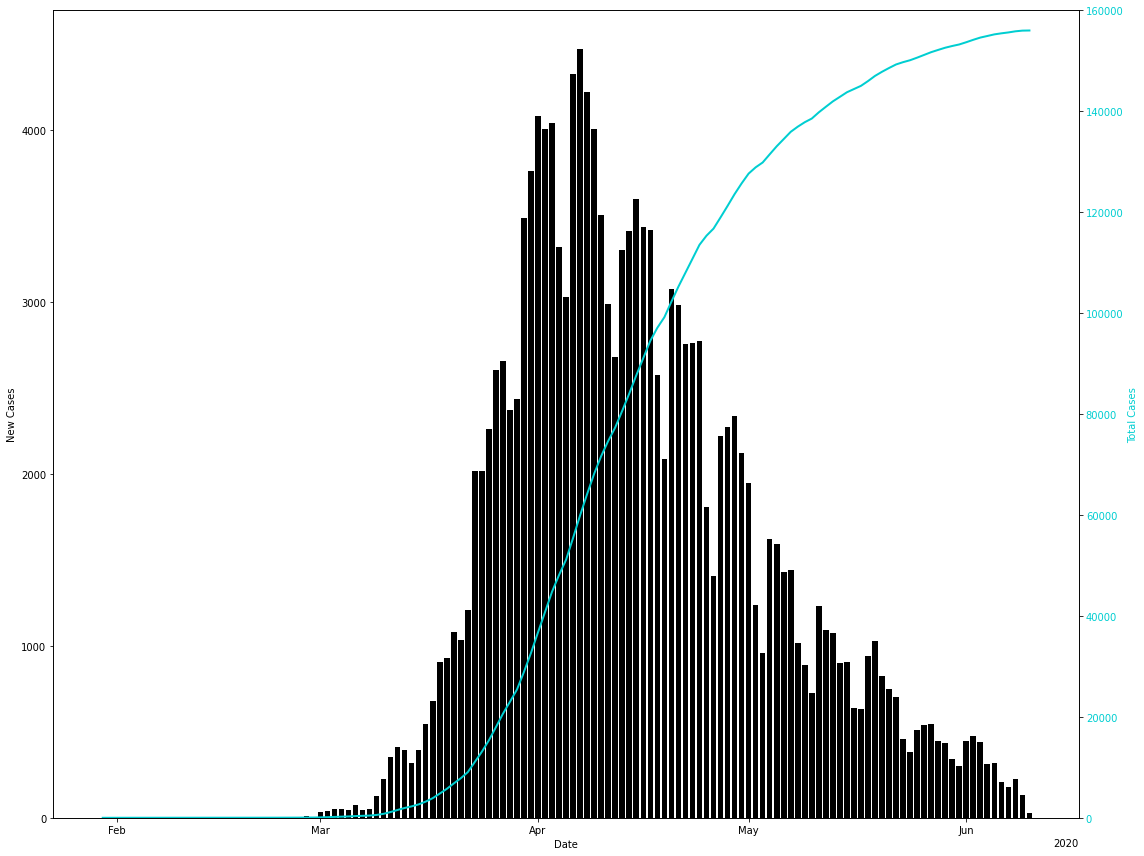

In [9]:
fig, ax1 = plt.subplots(figsize=(16,12))

color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('New Cases', color=color)
ax1.bar(cases['Date_'], cases['New_cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Total Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(cases['Date_'], cases['Total_cases'], color=color, linewidth=2)
ax2.set_ylim(0,160000)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

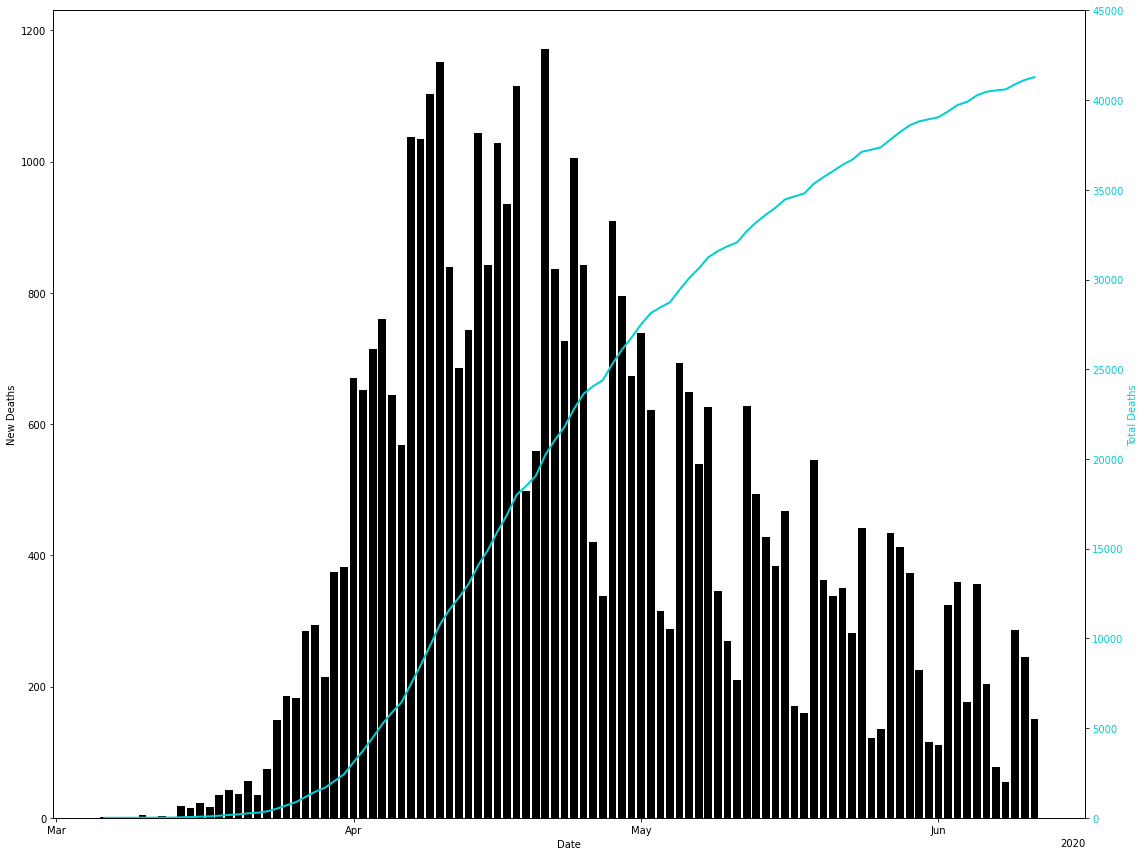

In [10]:
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

fig, ax1 = plt.subplots(figsize=(16,12))

color = 'k'
ax1.set_xlabel('Date'); ax1.xaxis.set_major_locator(locator); ax1.xaxis.set_major_formatter(formatter)
ax1.set_ylabel('New Deaths', color=color)
ax1.bar(deaths['Date_'], deaths['New_deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkturquoise'
ax2.xaxis.set_major_locator(locator); ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(deaths['Date_'], deaths['Total_deaths'], color=color, linewidth=2)
ax2.set_ylim(0,45000)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()